<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [52]:
import boto3
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [47]:
dataset = "ds4"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>

In [48]:
dataset_url

'https://aws-iot-analytics-dataset-2ac5413a-6cd8-49a8-a9aa-1e221f687f37.s3.us-east-2.amazonaws.com/results/9596bf58-a0f6-45a1-9537-e4a6e2c8b689.csv?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEJf%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMiJHMEUCIQDhF7Mg6oO0gNOvsMbQslKBfEDHly4efCTq7U7sdbYShwIgF6AJkRfIuIBYECOfaugbZUdYUha7YekuogZoHmpbQ8cq3wIIgP%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARACGgw1MDI3NTk4NTAyNDEiDFiuJGQ7%2BTFoqKLlICqzAqzpLDOAhYEKyzZqdAS9SmPJzNvefwJYlwIZWvHO9CUw1qN8wQ3jYgoTvZ%2FPEDwLjpC953RUsaOPPVDSPQtlX4D5hKkibv9iknCo%2FlR1NPMxBMphLDLbCpr1zSfeG5M9aUMNZSG7%2FF3TKQyn3bzpbMgySpjuot%2FXbbaVh%2BHMSzKtgT7pmzd94%2Bfe0Z6OCtfEhBntryQNYkJV2KOMJG82IULQNcAsOlYbNKRBXbDtjH8f02EdzwyDl58QdmiKLn4doQK00WWM%2BuRTPBYZ2WUpJYl7xgf6NXQ1GmMBAFDgupAjy%2BCj2EO1mbWnK1H4eUDZ7G9fS69g9IPwqXtPIJTqSRYIn9Tc489iTr0Q0ihxcUcFrLZ4OJrn8taeaJt8zyFFc%2B6hlAMihVCw7BvchSQJy3uephQw0obNoQY6vwEOVJXVfQk%2FaNzPZvozQgliWLy%2FTR5%2BNfhh77%2BD0tVo2qc3843iS%2FoQhMw2FhHFhndVnblQehMu%2BWP5nk%2B8XL1LXVTCSpI0ln9E%2BdZIeHzCDRGPJoMsjbrRUKl1hG3mnYq

In [50]:
response = requests.get(dataset_url)

if response.status_code == 200:
    # If the response status code is 200, the request was successful
    data = response.content.decode('utf-8')
    # Process the data here, for example by writing it to a file or parsing it as CSV
else:
    # If the response status code is not 200, there was an error
    print("Error: ", response.status_code)
    
data

'"co2","max_co2","time_stamp","vehicle","__dt"\n"9975.05","23476.3","28.0","0","2023-04-09 00:00:00.000"\n"9975.0","23476.3","28.0","0","2023-04-09 00:00:00.000"\n"7168.65","23476.3","238.0","0","2023-04-09 00:00:00.000"\n"0.0","23476.3","239.0","0","2023-04-09 00:00:00.000"\n"0.0","23476.3","240.0","0","2023-04-09 00:00:00.000"\n"0.0","23476.3","241.0","0","2023-04-09 00:00:00.000"\n"6411.34","23476.3","242.0","0","2023-04-09 00:00:00.000"\n"5808.13","23476.3","243.0","0","2023-04-09 00:00:00.000"\n"8647.24","23476.3","244.0","0","2023-04-09 00:00:00.000"\n"6981.94","23476.3","245.0","0","2023-04-09 00:00:00.000"\n"0.0","23476.3","246.0","0","2023-04-09 00:00:00.000"\n"2586.36","23476.3","247.0","0","2023-04-09 00:00:00.000"\n"9777.49","23476.3","248.0","0","2023-04-09 00:00:00.000"\n"0.0","23476.3","249.0","0","2023-04-09 00:00:00.000"\n"4819.71","23476.3","250.0","0","2023-04-09 00:00:00.000"\n"0.0","23476.3","251.0","0","2023-04-09 00:00:00.000"\n"3955.93","23476.3","252.0","0","20

In [53]:
# Read the data into a pandas DataFrame
df = pd.read_csv(StringIO(data))

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

print(df_no_duplicates)

          co2   max_co2  time_stamp  vehicle                     __dt
0     9975.05  23476.30        28.0        0  2023-04-09 00:00:00.000
1     9975.00  23476.30        28.0        0  2023-04-09 00:00:00.000
2     7168.65  23476.30       238.0        0  2023-04-09 00:00:00.000
3        0.00  23476.30       239.0        0  2023-04-09 00:00:00.000
4        0.00  23476.30       240.0        0  2023-04-09 00:00:00.000
...       ...       ...         ...      ...                      ...
1444     0.00  19466.87       398.0        4  2023-04-09 00:00:00.000
1445  8989.02  19466.87       399.0        4  2023-04-09 00:00:00.000
1446     0.00  19466.87       400.0        4  2023-04-09 00:00:00.000
1447     0.00  19466.87       401.0        4  2023-04-09 00:00:00.000
1448     0.00  19466.87       402.0        4  2023-04-09 00:00:00.000

[1333 rows x 5 columns]


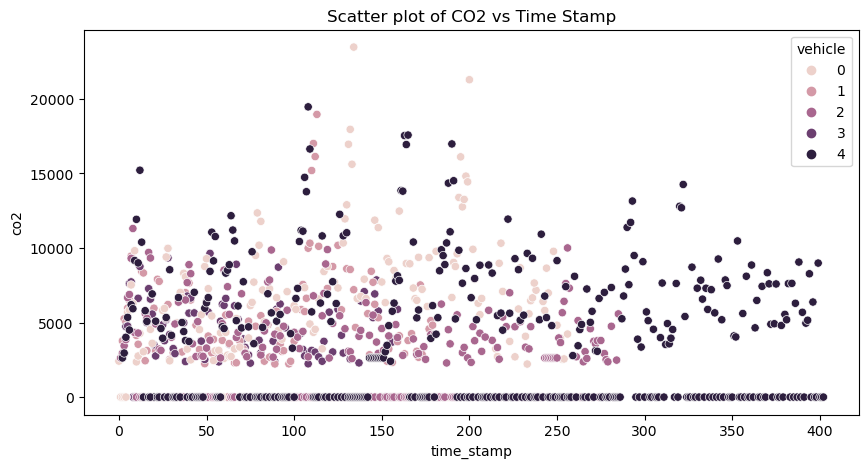

In [54]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x="time_stamp", y="co2", hue="vehicle", data=df_no_duplicates)
plt.title("Scatter plot of CO2 vs Time Stamp")
plt.show()

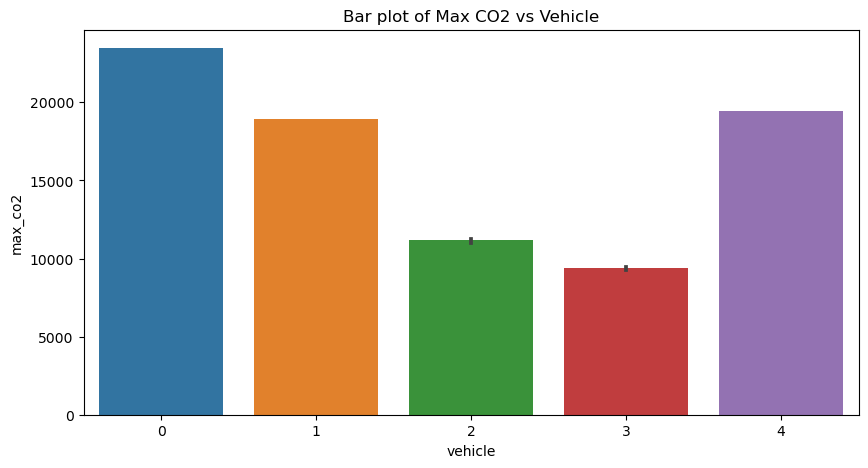

In [56]:
# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="vehicle", y="max_co2", data=df_no_duplicates)
plt.title("Bar plot of Max CO2 vs Vehicle")
plt.show()

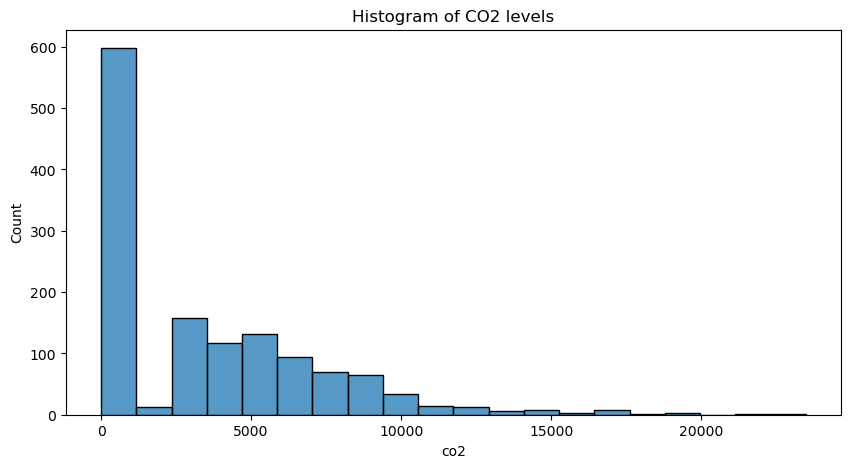

In [57]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_no_duplicates['co2'], kde=False, bins=20)
plt.title("Histogram of CO2 levels")
plt.show()

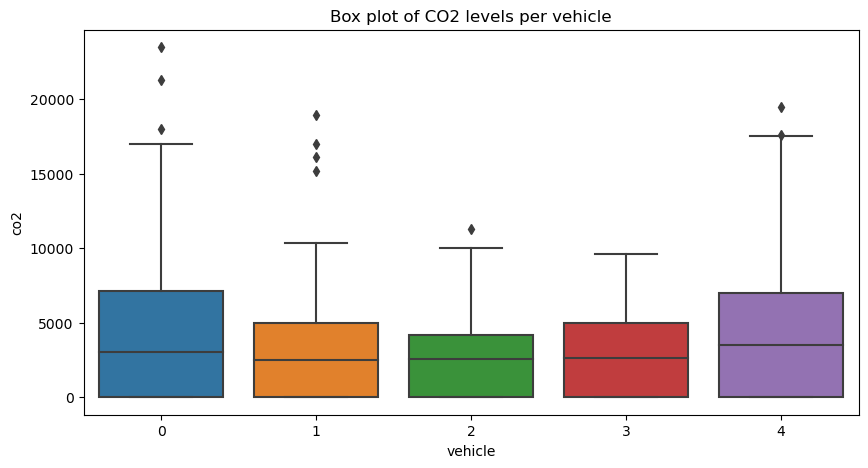

In [58]:
# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='vehicle', y='co2', data=df_no_duplicates)
plt.title("Box plot of CO2 levels per vehicle")
plt.show()


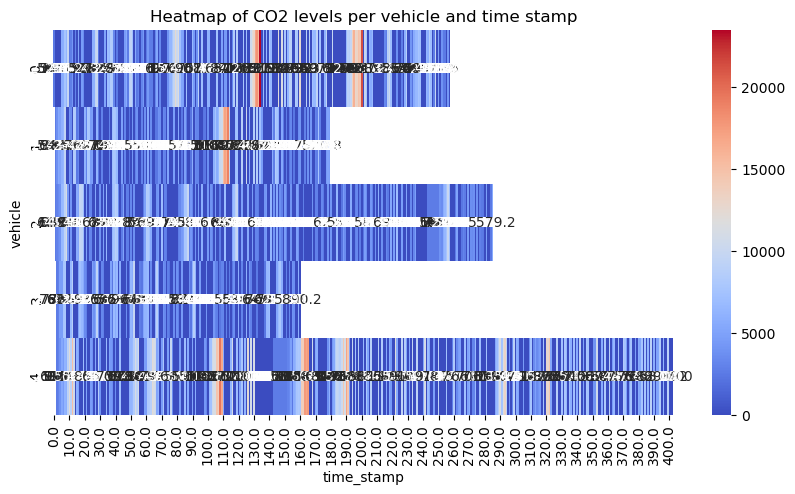

In [59]:
# Heatmap
plt.figure(figsize=(10, 5))
co2_pivot = df_no_duplicates.pivot_table(index='vehicle', columns='time_stamp', values='co2')
sns.heatmap(co2_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Heatmap of CO2 levels per vehicle and time stamp")
plt.show()